In [86]:
import numpy as np
import pandas as pd

In [87]:
DPath = r'D:\QuantData'

In [88]:
history = pd.read_csv(DPath + r'\daily_history.csv')[['stock_code', 'date', 'close']]
score = pd.read_csv(DPath + r'\ESG\score.csv')
score = score.sort_values(by=['STOCK_CODE']).reset_index(drop=True)

In [89]:
rr = history.groupby(by=['stock_code']).apply(lambda x: x['close'].values[0] / x['close'].values[-1] - 1)

In [90]:
pd.unique(history['stock_code']).shape

(800,)

In [91]:
threshold = np.quantile(score['ESG_score'], [.2, .4, .6, .8])

In [92]:
def g(s):
    for i in range(4):
        if s <= threshold[i]:
            return i
    return 4
group = [g(s) for s in score['ESG_score']]

In [94]:
set(score['STOCK_CODE'].values) == set(rr.index.values)

True

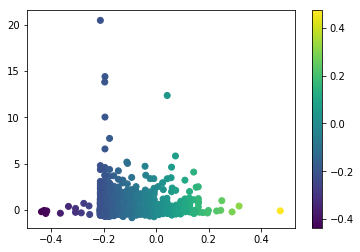

In [95]:
import matplotlib.pyplot as plt


plt.scatter(score['ESG_score'], rr, c=score['ESG_score'])
plt.colorbar()

{'whiskers': [<matplotlib.lines.Line2D at 0x1a40a88ef60>,
 'caps': [<matplotlib.lines.Line2D at 0x1a40abab908>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a40a88ee10>,
 'medians': [<matplotlib.lines.Line2D at 0x1a40ababf98>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a40ababef0>,
 'means': []}

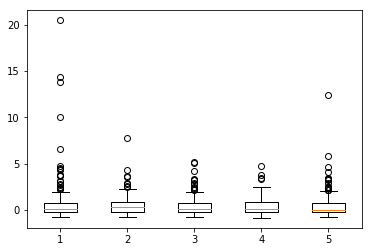

In [96]:
plt.boxplot([rr[np.array(group) == i].values for i in range(5)])

In [107]:
risk = history.groupby(by=['stock_code']).apply(lambda x: np.std(x['close'].values / x['close'].values[-1] - 1))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a40a555208>,
 'caps': [<matplotlib.lines.Line2D at 0x1a40a625dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a40a5b0f98>,
 'medians': [<matplotlib.lines.Line2D at 0x1a40a625240>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a40a63b0f0>,
 'means': []}

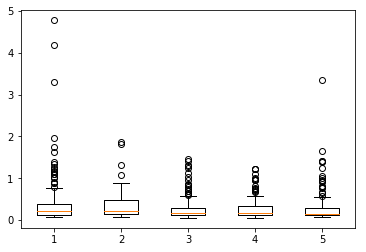

In [108]:
plt.boxplot([risk[np.array(group) == i].values for i in range(5)])

In [109]:
m = history.groupby(by=['stock_code']).apply(lambda x: x['close'].values / x['close'].values[-1])

 #%%


